In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/20.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/6.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5_processed (3).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (1).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (2).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/4_processed(3).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/8.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/9_processed (2).jpg
/kaggle/input/fabric-defect-da

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, random_split, Dataset
from torchvision import models, transforms
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [3]:
class FabricDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self._load_images()

    def _load_images(self):
        images = []
        for cls in self.classes:
            cls_dir = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                images.append((img_path, self.class_to_idx[cls]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
dataset = FabricDefectDataset(root_dir='/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset', transform=transform)

Fold 1


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:02<00:00, 212MB/s]  


Epoch [1/20], Loss: 2.2151, Accuracy: 33.85%, Val Loss: 2.2544, Val Accuracy: 26.60%
Epoch [2/20], Loss: 1.5021, Accuracy: 40.88%, Val Loss: 0.7558, Val Accuracy: 75.96%
Epoch [3/20], Loss: 1.2218, Accuracy: 61.16%, Val Loss: 0.9828, Val Accuracy: 63.17%
Epoch [4/20], Loss: 1.2067, Accuracy: 64.30%, Val Loss: 0.6508, Val Accuracy: 80.82%
Epoch [5/20], Loss: 1.1052, Accuracy: 77.16%, Val Loss: 0.5276, Val Accuracy: 78.26%
Epoch [6/20], Loss: 1.0796, Accuracy: 76.33%, Val Loss: 0.8732, Val Accuracy: 68.29%
Epoch [7/20], Loss: 1.1652, Accuracy: 74.22%, Val Loss: 0.5352, Val Accuracy: 78.77%
Epoch [8/20], Loss: 1.0184, Accuracy: 79.97%, Val Loss: 0.5916, Val Accuracy: 83.89%
Early stopping!


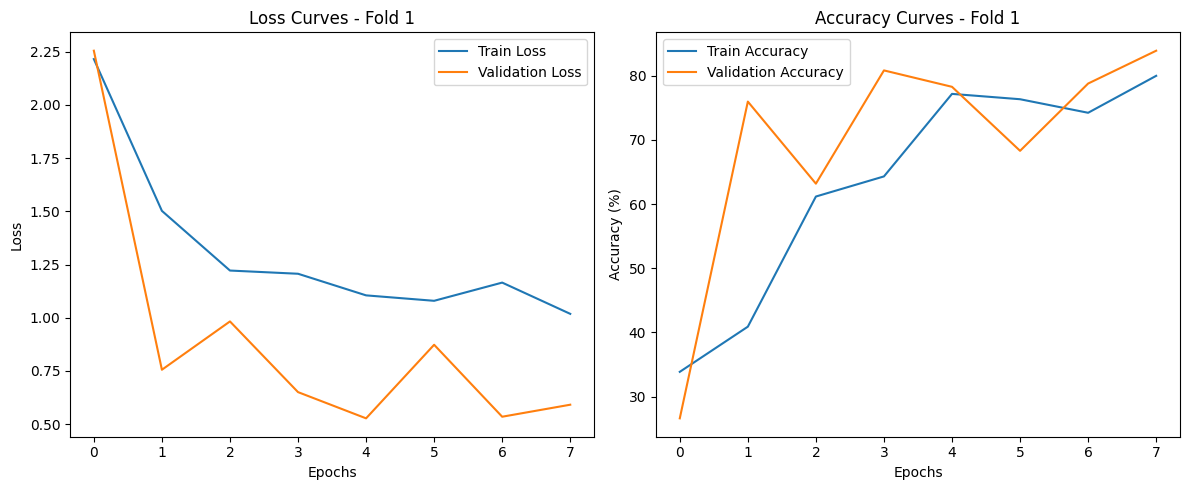

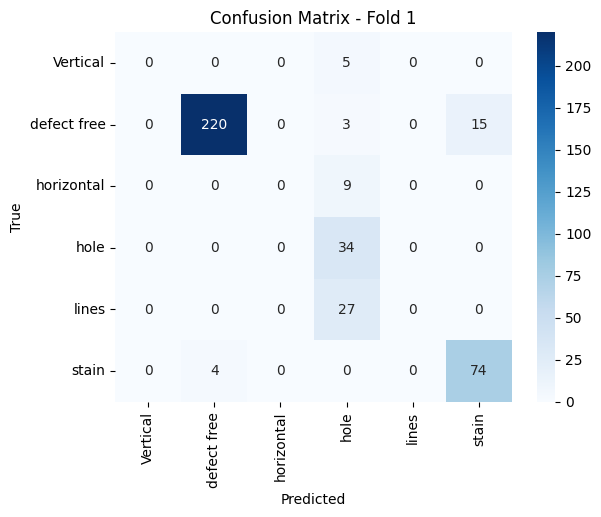

Classification Report - Fold 1
              precision    recall  f1-score   support

    Vertical       0.00      0.00      0.00         5
 defect free       0.98      0.92      0.95       238
  horizontal       0.00      0.00      0.00         9
        hole       0.44      1.00      0.61        34
       lines       0.00      0.00      0.00        27
       stain       0.83      0.95      0.89        78

    accuracy                           0.84       391
   macro avg       0.37      0.48      0.41       391
weighted avg       0.80      0.84      0.81       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


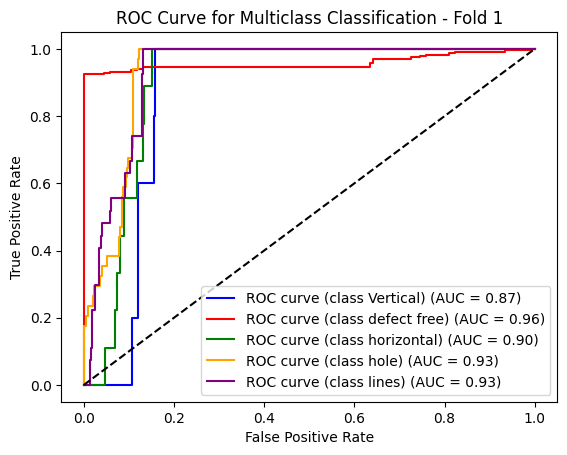


Image Index: 0
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.20598626 0.02700656 0.24286047 0.27037445 0.24628864 0.00748367]


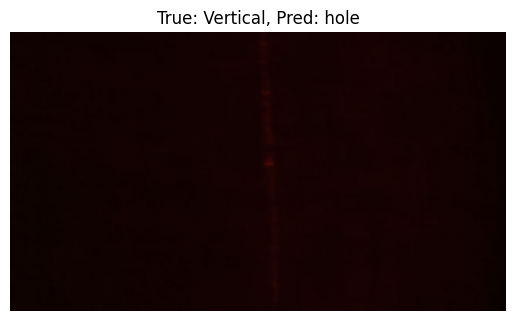


Image Index: 1
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.20603897 0.02699111 0.24276857 0.27037743 0.24633886 0.00748509]


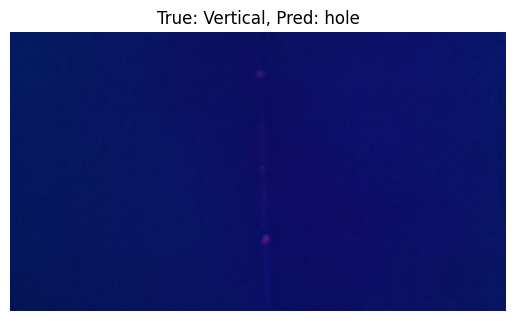


Image Index: 2
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.205989   0.02700181 0.24286184 0.27037346 0.2462914  0.00748249]


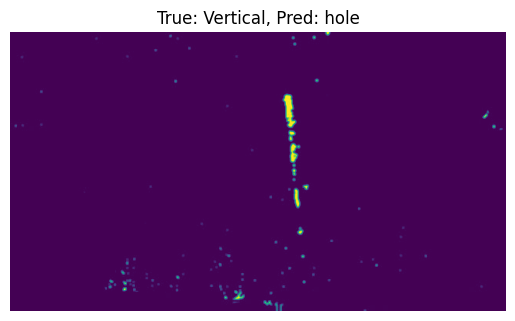


Image Index: 3
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.20549679 0.02724471 0.24354002 0.27041915 0.245799   0.0075003 ]


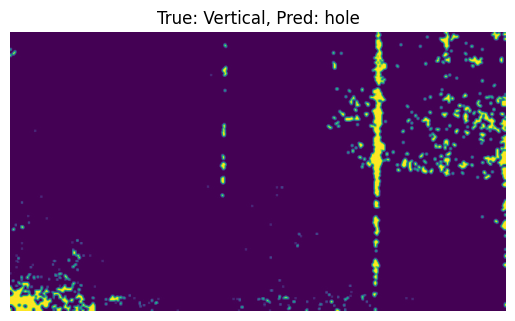


Image Index: 4
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.20552528 0.02719765 0.24355426 0.27039844 0.24583565 0.00748874]


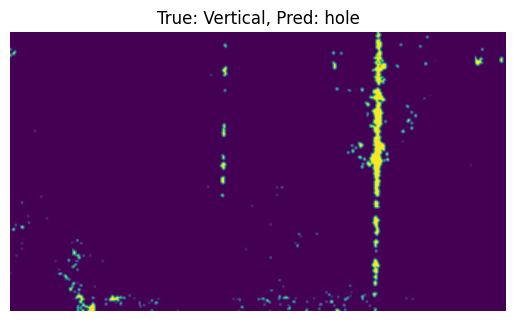


Image Index: 11
True Label: defect free
Predicted Label: stain
Class Probabilities: [1.3604832e-06 2.1567533e-02 1.8370604e-07 3.6309302e-05 1.1295028e-05
 9.7838336e-01]


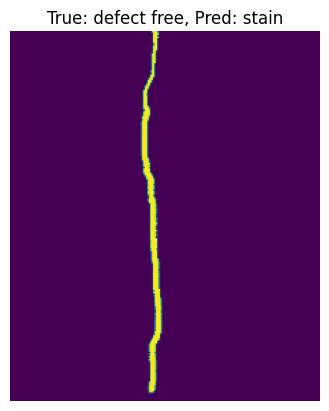


Image Index: 38
True Label: defect free
Predicted Label: stain
Class Probabilities: [5.0322320e-09 2.5057669e-03 2.7224620e-10 4.4360573e-07 1.3218946e-07
 9.9749362e-01]


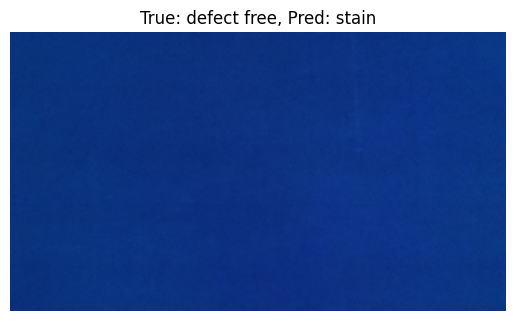


Image Index: 39
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.20665106 0.02679076 0.24179886 0.27041286 0.24684967 0.00749675]


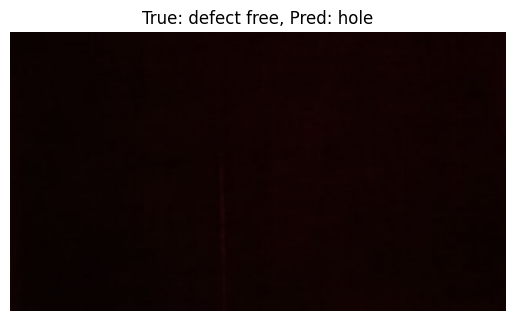


Image Index: 74
True Label: defect free
Predicted Label: stain
Class Probabilities: [7.6648057e-08 7.2631310e-03 6.2298593e-09 3.6777019e-06 9.5327533e-07
 9.9273211e-01]


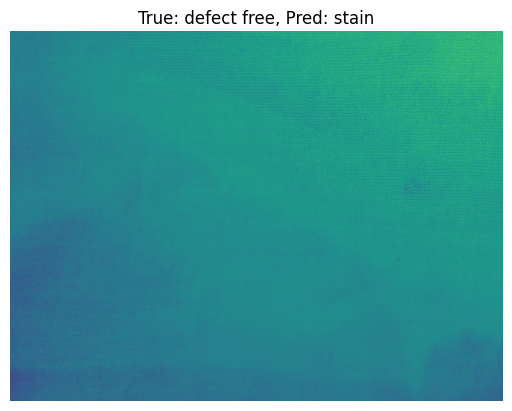


Image Index: 75
True Label: defect free
Predicted Label: stain
Class Probabilities: [2.2316986e-08 4.6126284e-03 1.4794912e-09 1.4201552e-06 3.5550875e-07
 9.9538559e-01]


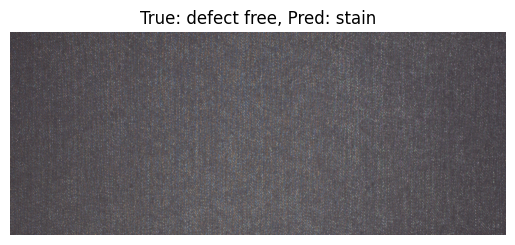

Fold 2
Epoch [1/20], Loss: 2.3892, Accuracy: 34.87%, Val Loss: 1.4507, Val Accuracy: 25.32%
Epoch [2/20], Loss: 1.6510, Accuracy: 49.01%, Val Loss: 1.6674, Val Accuracy: 28.13%
Epoch [3/20], Loss: 1.7042, Accuracy: 34.04%, Val Loss: 2.6580, Val Accuracy: 49.10%
Epoch [4/20], Loss: 1.5793, Accuracy: 48.75%, Val Loss: 1.0166, Val Accuracy: 74.94%
Epoch [5/20], Loss: 1.1938, Accuracy: 76.52%, Val Loss: 0.6859, Val Accuracy: 75.45%
Epoch [6/20], Loss: 1.0641, Accuracy: 77.99%, Val Loss: 0.9846, Val Accuracy: 80.82%
Epoch [7/20], Loss: 1.2309, Accuracy: 70.95%, Val Loss: 0.5851, Val Accuracy: 78.26%
Epoch [8/20], Loss: 1.3873, Accuracy: 64.68%, Val Loss: 2.7382, Val Accuracy: 58.57%
Epoch [9/20], Loss: 1.7952, Accuracy: 38.39%, Val Loss: 1.1780, Val Accuracy: 67.77%
Epoch [10/20], Loss: 1.9389, Accuracy: 58.22%, Val Loss: 1.8795, Val Accuracy: 1.53%
Early stopping!


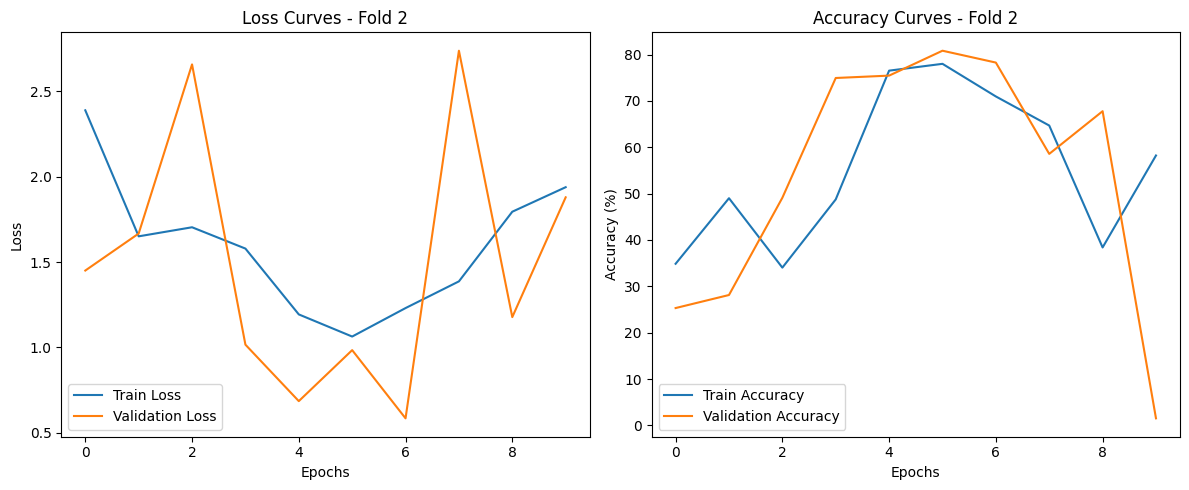

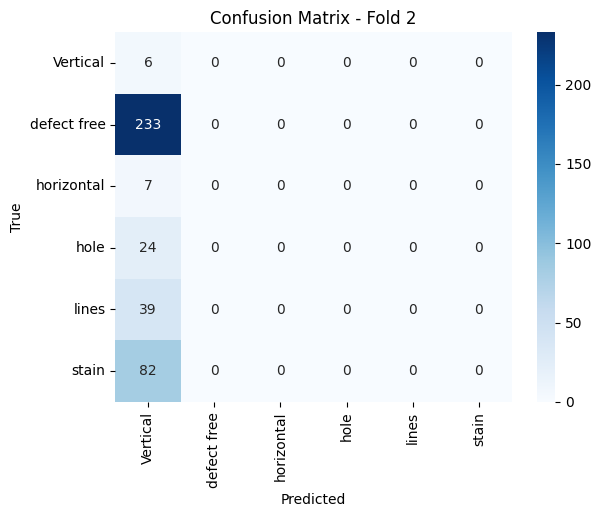

Classification Report - Fold 2
              precision    recall  f1-score   support

    Vertical       0.02      1.00      0.03         6
 defect free       0.00      0.00      0.00       233
  horizontal       0.00      0.00      0.00         7
        hole       0.00      0.00      0.00        24
       lines       0.00      0.00      0.00        39
       stain       0.00      0.00      0.00        82

    accuracy                           0.02       391
   macro avg       0.00      0.17      0.01       391
weighted avg       0.00      0.02      0.00       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


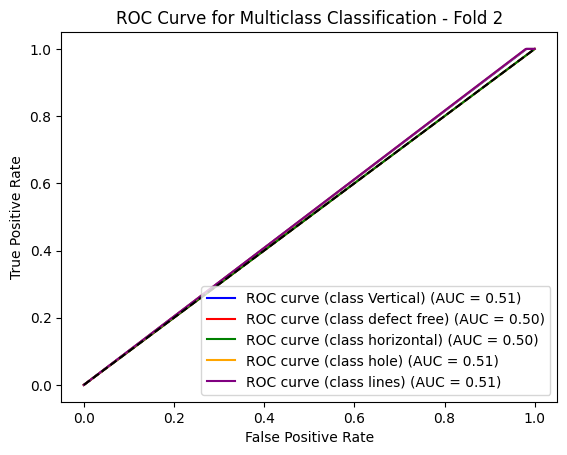


Image Index: 6
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


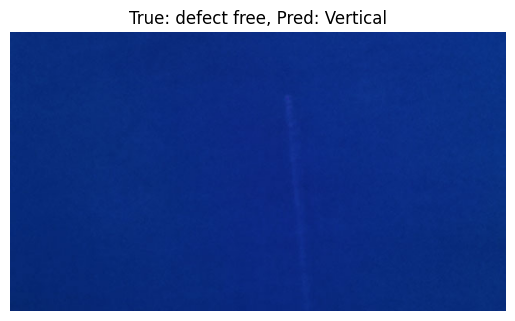


Image Index: 7
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


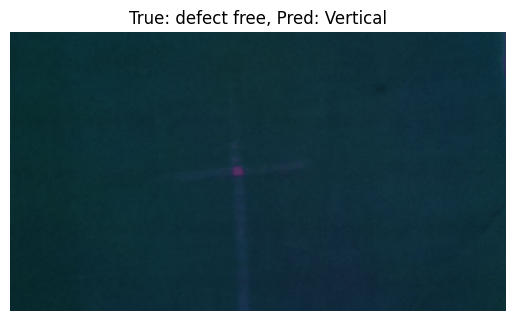


Image Index: 8
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


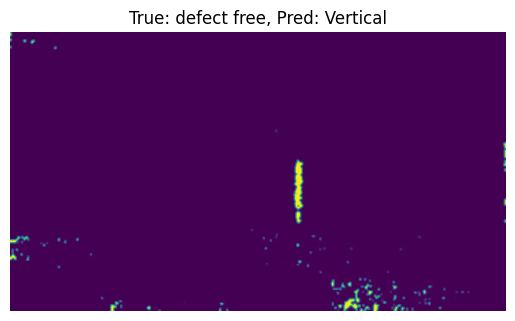


Image Index: 9
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


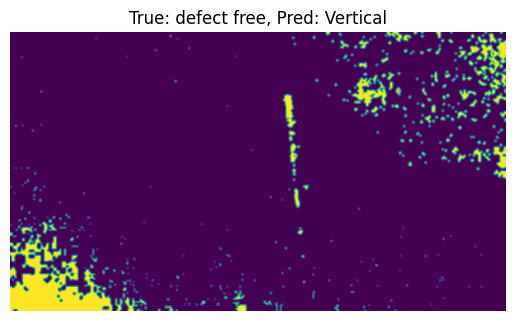


Image Index: 10
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


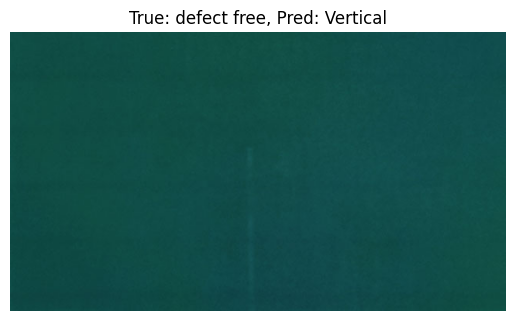


Image Index: 11
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


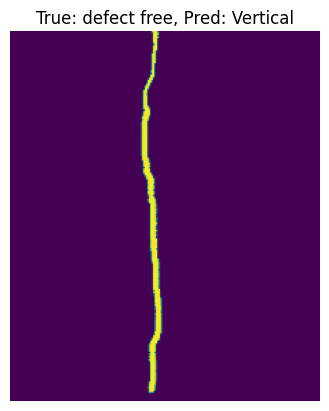


Image Index: 12
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


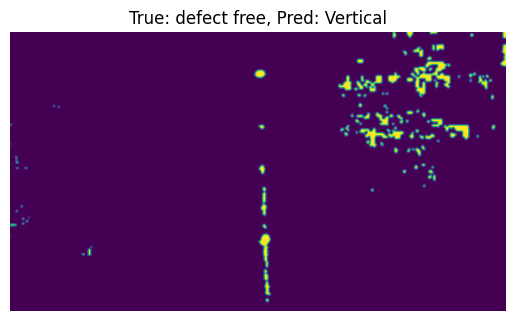


Image Index: 13
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


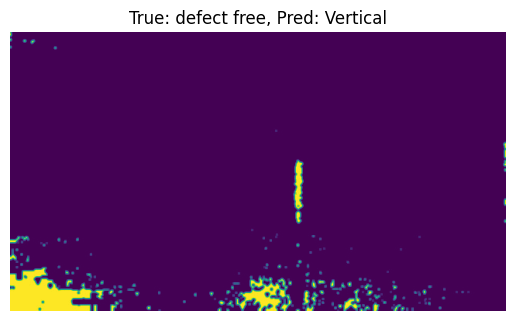


Image Index: 14
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


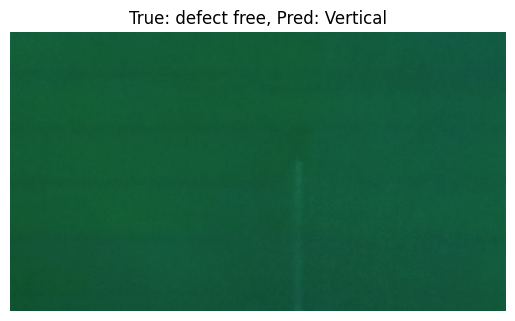


Image Index: 15
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.20978937 0.20636299 0.20359714 0.15479696 0.15297435 0.07247922]


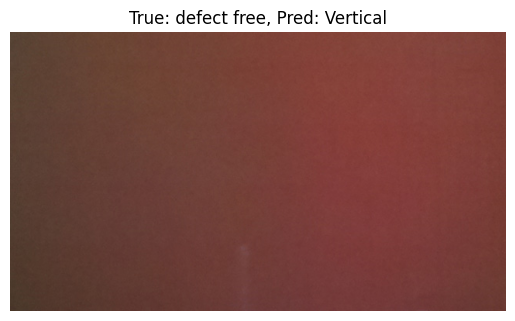

Fold 3
Epoch [1/20], Loss: 2.1532, Accuracy: 29.75%, Val Loss: 1.2853, Val Accuracy: 57.03%
Epoch [2/20], Loss: 1.9240, Accuracy: 38.07%, Val Loss: 1.7537, Val Accuracy: 11.25%
Epoch [3/20], Loss: 1.4686, Accuracy: 41.65%, Val Loss: 1.1185, Val Accuracy: 27.37%
Epoch [4/20], Loss: 1.4412, Accuracy: 41.84%, Val Loss: 1.1384, Val Accuracy: 28.39%
Epoch [5/20], Loss: 1.8657, Accuracy: 35.70%, Val Loss: 1.8569, Val Accuracy: 18.93%
Epoch [6/20], Loss: 2.1411, Accuracy: 31.93%, Val Loss: 1.7788, Val Accuracy: 51.66%
Early stopping!


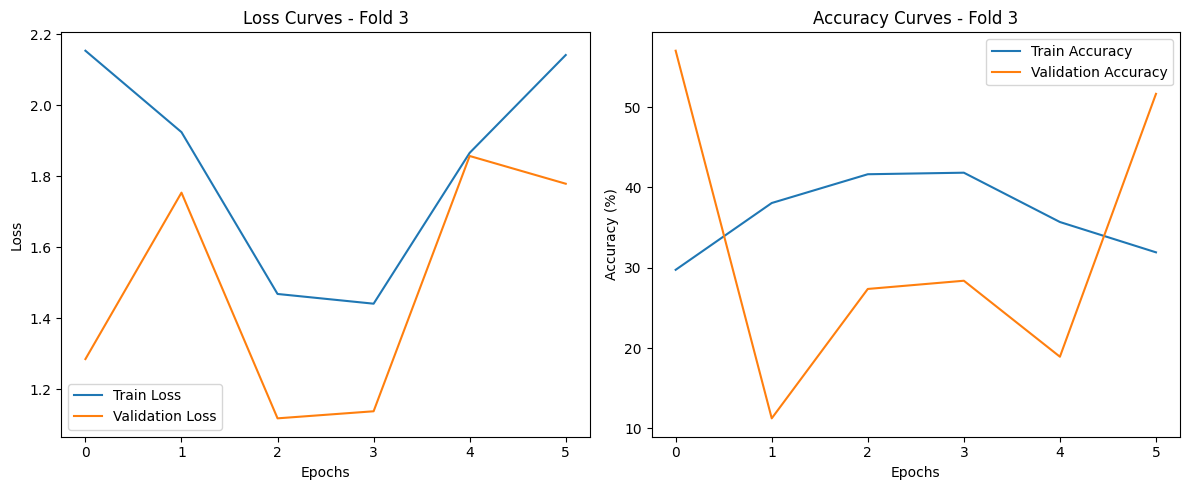

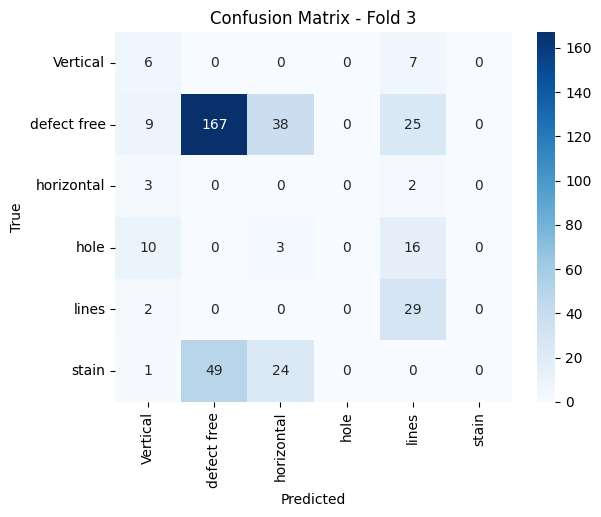

Classification Report - Fold 3
              precision    recall  f1-score   support

    Vertical       0.19      0.46      0.27        13
 defect free       0.77      0.70      0.73       239
  horizontal       0.00      0.00      0.00         5
        hole       0.00      0.00      0.00        29
       lines       0.37      0.94      0.53        31
       stain       0.00      0.00      0.00        74

    accuracy                           0.52       391
   macro avg       0.22      0.35      0.26       391
weighted avg       0.51      0.52      0.50       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


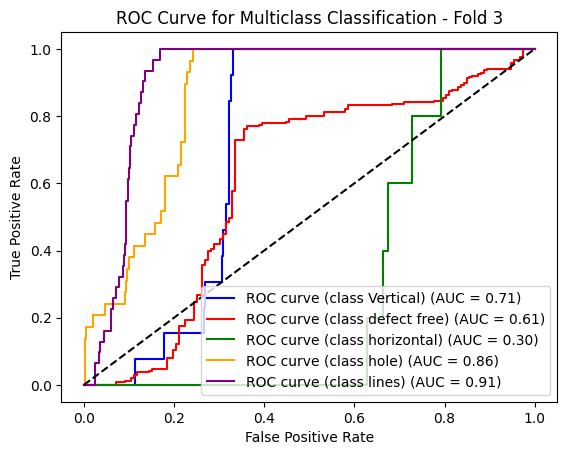


Image Index: 1
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.21649438 0.07626133 0.14168786 0.23463984 0.2550098  0.07590681]


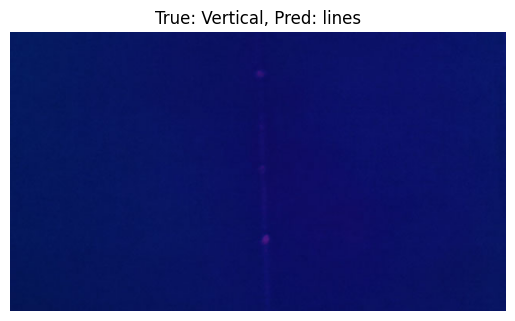


Image Index: 3
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.20353687 0.11919177 0.1570039  0.19787407 0.20612346 0.11626989]


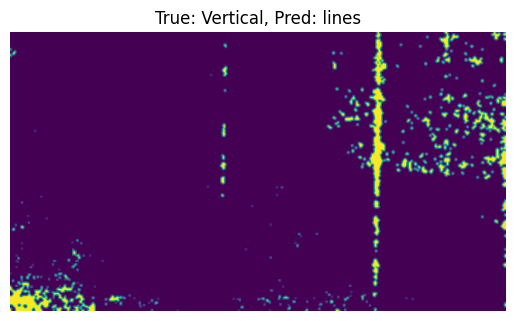


Image Index: 4
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.20385405 0.11192731 0.15857314 0.2027927  0.21255913 0.11029365]


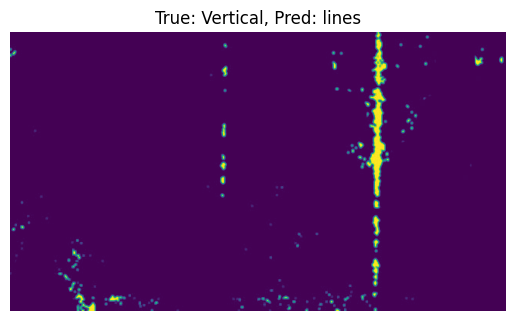


Image Index: 5
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.20502831 0.10474259 0.15891066 0.20826158 0.21947761 0.10357931]


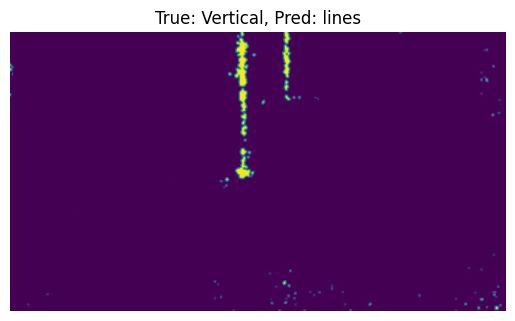


Image Index: 6
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.2046188  0.10631125 0.15895675 0.2070803  0.21792102 0.10511189]


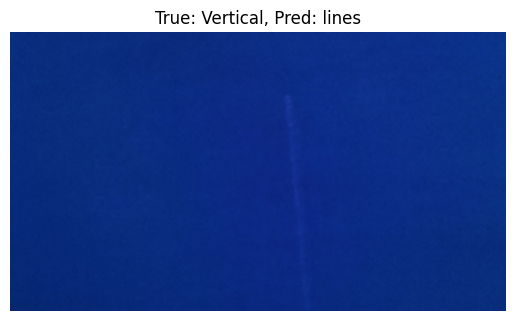


Image Index: 9
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.21318579 0.08535231 0.14960015 0.22543466 0.24184425 0.08458278]


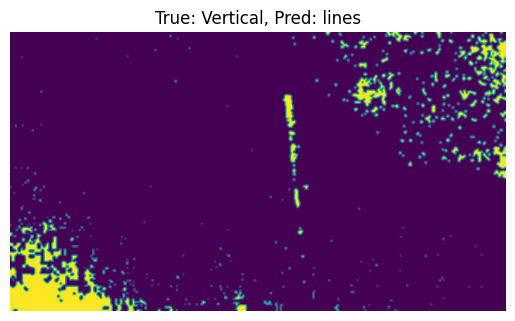


Image Index: 11
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.20378695 0.11347204 0.15829954 0.20172207 0.21109058 0.11162885]


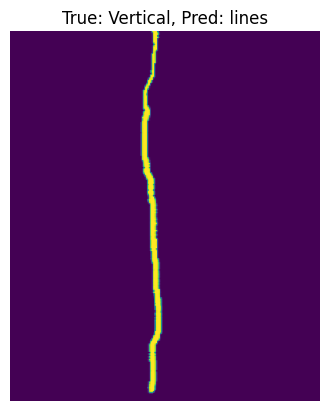


Image Index: 15
True Label: defect free
Predicted Label: lines
Class Probabilities: [0.21293232 0.08601254 0.15012796 0.2247842  0.24092712 0.08521587]


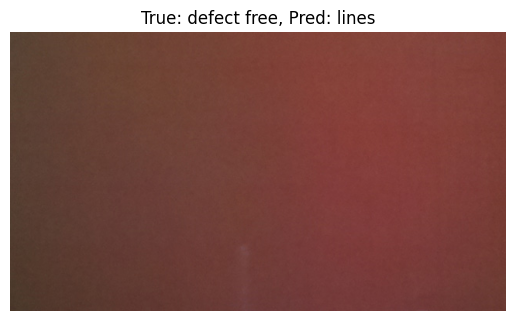


Image Index: 18
True Label: defect free
Predicted Label: horizontal
Class Probabilities: [0.31889212 0.04937182 0.3498472  0.13714996 0.10548154 0.03925732]


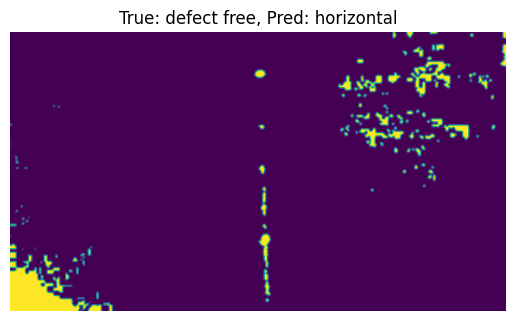


Image Index: 20
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.18466164 0.16925679 0.1618129  0.16267997 0.17162648 0.14996216]


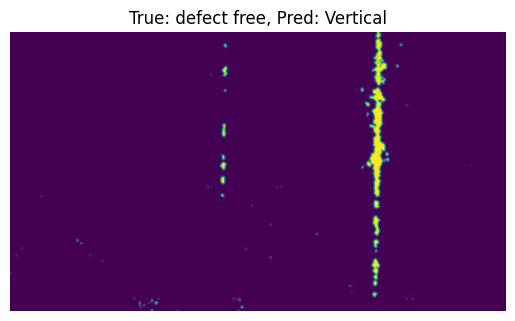

Fold 4
Epoch [1/20], Loss: 2.2307, Accuracy: 37.24%, Val Loss: 1.5246, Val Accuracy: 63.68%
Epoch [2/20], Loss: 1.4810, Accuracy: 45.36%, Val Loss: 0.5169, Val Accuracy: 84.40%
Epoch [3/20], Loss: 1.1611, Accuracy: 73.19%, Val Loss: 0.4653, Val Accuracy: 83.38%
Epoch [4/20], Loss: 1.0605, Accuracy: 76.46%, Val Loss: 0.4507, Val Accuracy: 81.07%
Epoch [5/20], Loss: 1.4672, Accuracy: 67.63%, Val Loss: 1.3074, Val Accuracy: 62.92%
Epoch [6/20], Loss: 1.7878, Accuracy: 28.34%, Val Loss: 1.3574, Val Accuracy: 27.62%
Epoch [7/20], Loss: 1.1700, Accuracy: 66.22%, Val Loss: 0.5414, Val Accuracy: 80.82%
Early stopping!


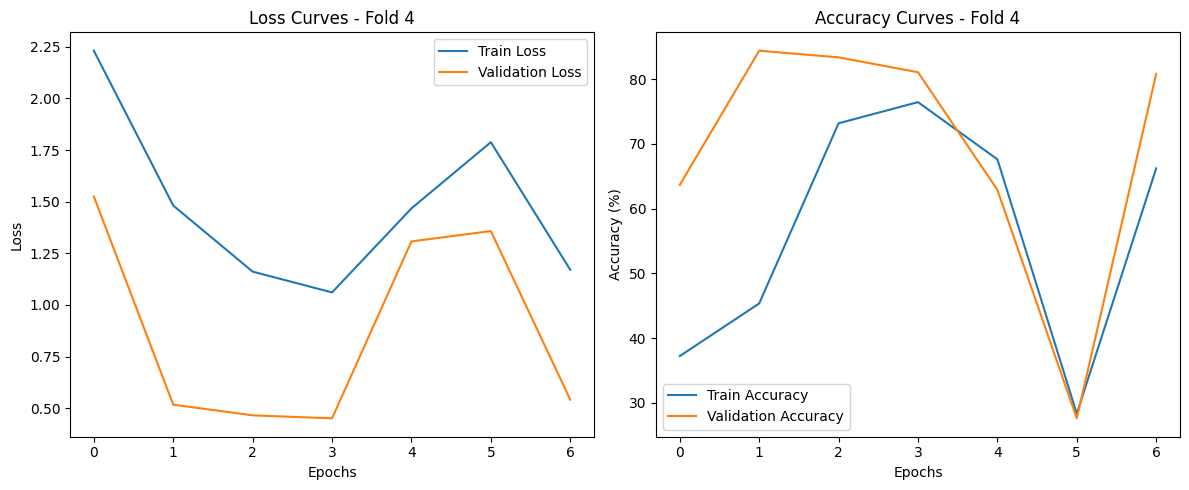

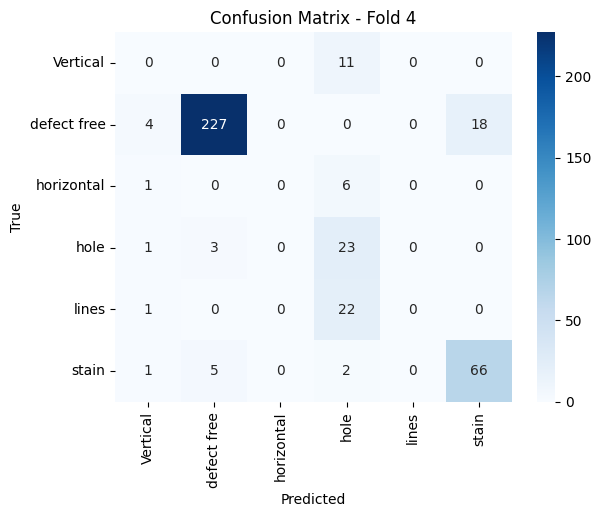

Classification Report - Fold 4
              precision    recall  f1-score   support

    Vertical       0.00      0.00      0.00        11
 defect free       0.97      0.91      0.94       249
  horizontal       0.00      0.00      0.00         7
        hole       0.36      0.85      0.51        27
       lines       0.00      0.00      0.00        23
       stain       0.79      0.89      0.84        74

    accuracy                           0.81       391
   macro avg       0.35      0.44      0.38       391
weighted avg       0.79      0.81      0.79       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


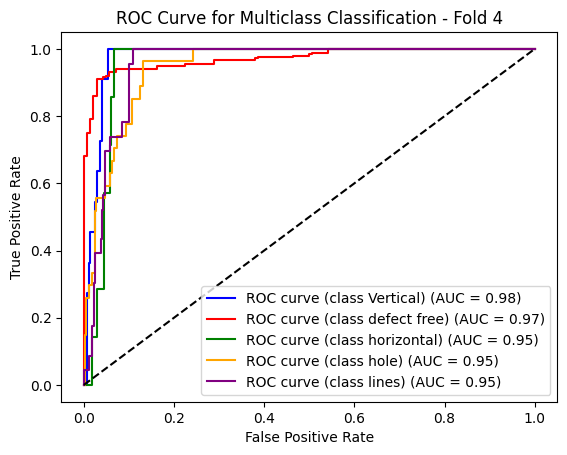


Image Index: 0
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28593206 0.00145325 0.09744143 0.32281914 0.2917899  0.0005642 ]


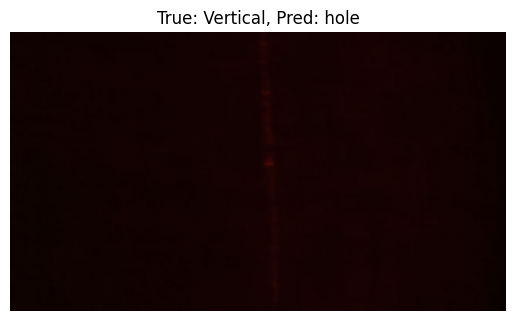


Image Index: 1
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28599063 0.00124805 0.09442958 0.32494116 0.29291892 0.00047162]


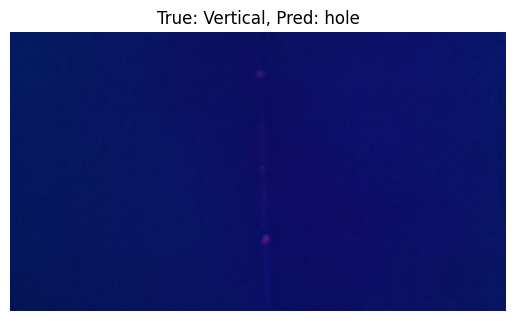


Image Index: 2
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28397852 0.00411407 0.12042279 0.3068912  0.28267035 0.0019231 ]


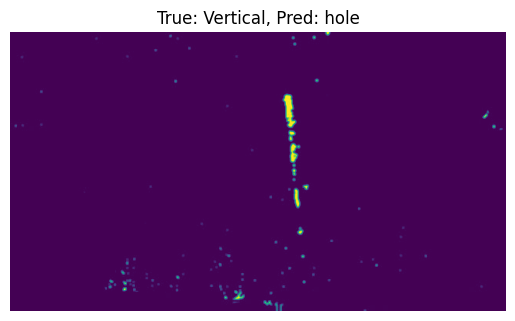


Image Index: 3
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28589484 0.00153791 0.09858421 0.32202095 0.29135904 0.0006031 ]


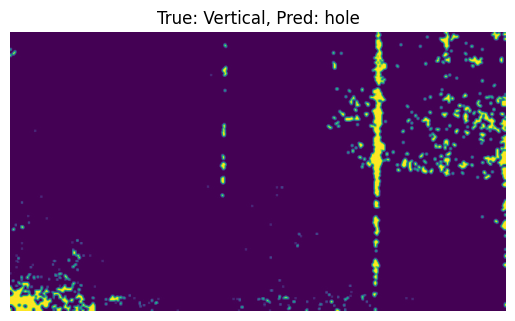


Image Index: 4
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.2851437  0.00266713 0.11033768 0.31388748 0.28681043 0.00115362]


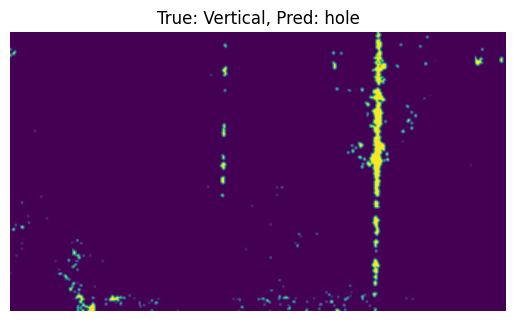


Image Index: 5
True Label: Vertical
Predicted Label: hole
Class Probabilities: [2.8597385e-01 9.1445021e-04 8.8526905e-02 3.2916397e-01 2.9509380e-01
 3.2701532e-04]


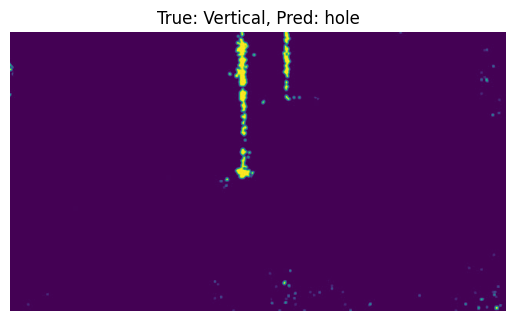


Image Index: 6
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28363857 0.00452123 0.12270541 0.3053093  0.28167602 0.00214946]


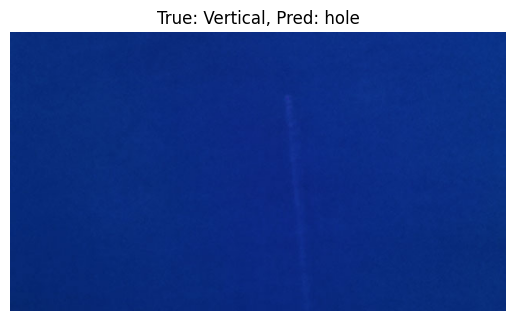


Image Index: 7
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28398052 0.00411162 0.12040844 0.30690116 0.2826765  0.00192175]


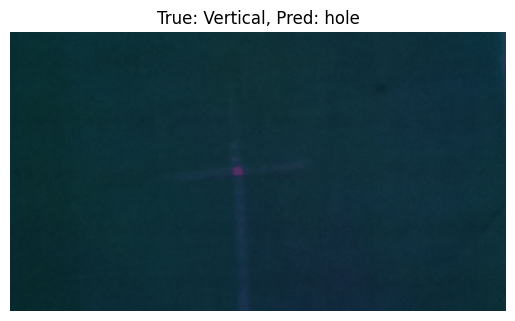


Image Index: 8
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.2842028  0.00383978 0.11877336 0.308039   0.28337225 0.00177281]


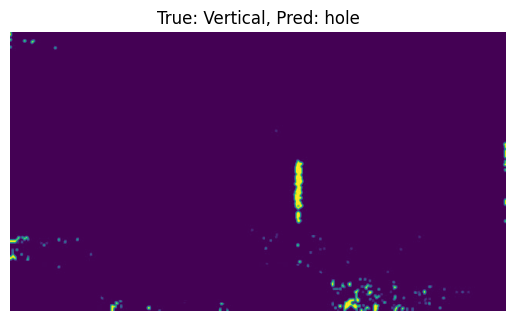


Image Index: 9
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.2847623  0.00315783 0.1141827  0.31122038 0.28526902 0.00140778]


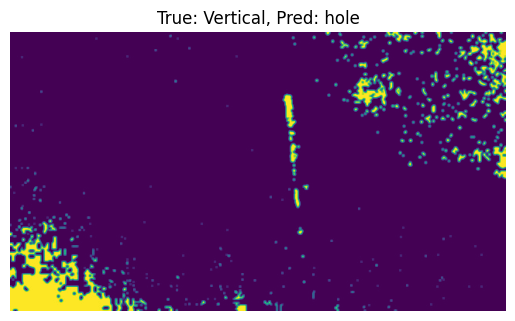

Fold 5
Epoch [1/20], Loss: 1.8025, Accuracy: 39.58%, Val Loss: 1.1473, Val Accuracy: 25.13%
Epoch [2/20], Loss: 1.5797, Accuracy: 36.83%, Val Loss: 0.9504, Val Accuracy: 65.38%
Epoch [3/20], Loss: 1.6341, Accuracy: 40.98%, Val Loss: 2.1629, Val Accuracy: 7.44%
Epoch [4/20], Loss: 1.8537, Accuracy: 21.16%, Val Loss: 1.7366, Val Accuracy: 23.08%
Epoch [5/20], Loss: 1.7993, Accuracy: 18.48%, Val Loss: 1.6975, Val Accuracy: 23.08%
Early stopping!


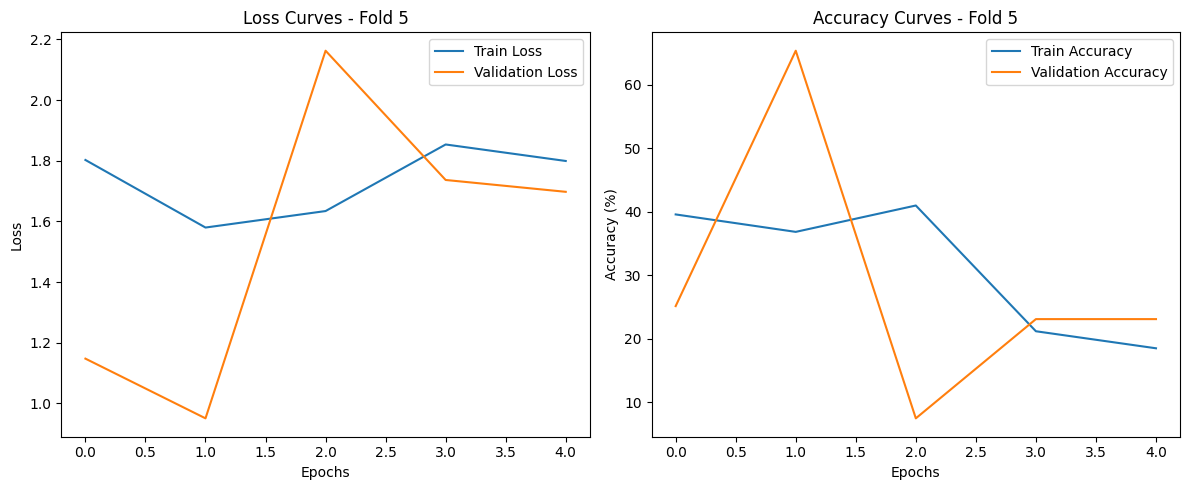

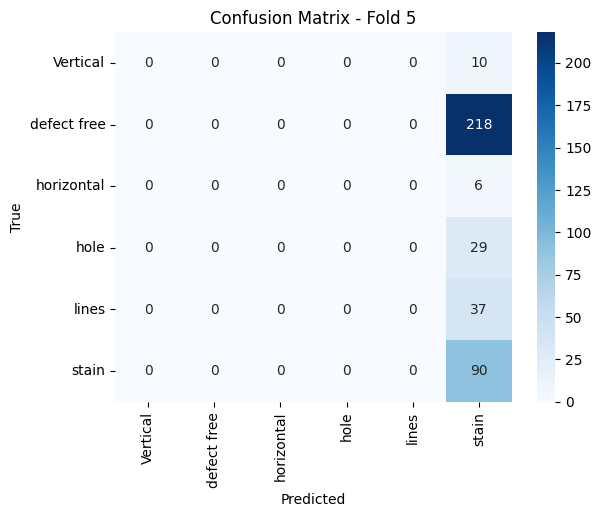

Classification Report - Fold 5
              precision    recall  f1-score   support

    Vertical       0.00      0.00      0.00        10
 defect free       0.00      0.00      0.00       218
  horizontal       0.00      0.00      0.00         6
        hole       0.00      0.00      0.00        29
       lines       0.00      0.00      0.00        37
       stain       0.23      1.00      0.38        90

    accuracy                           0.23       390
   macro avg       0.04      0.17      0.06       390
weighted avg       0.05      0.23      0.09       390



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


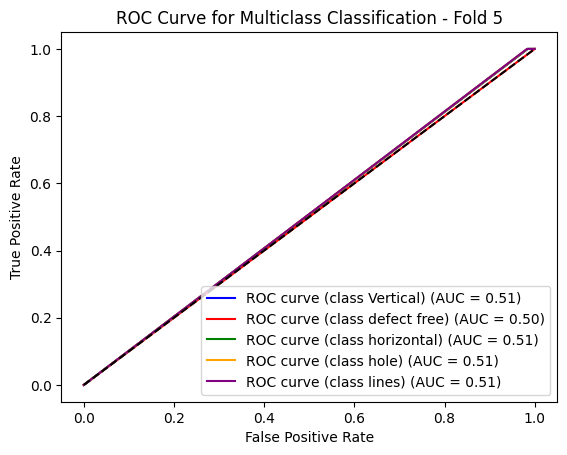


Image Index: 0
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


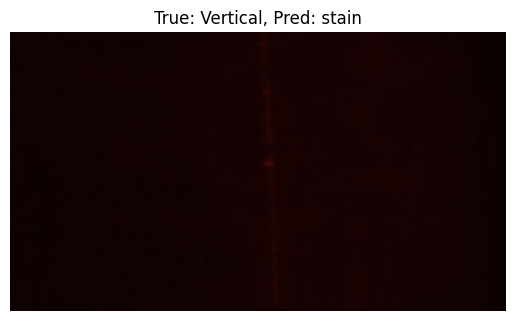


Image Index: 1
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


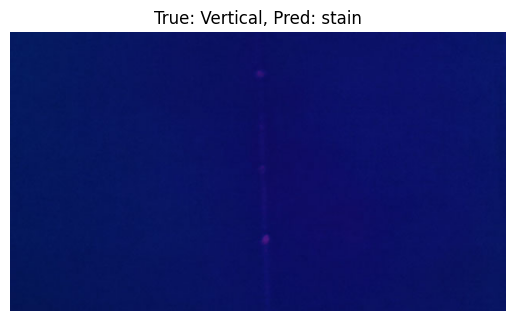


Image Index: 2
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


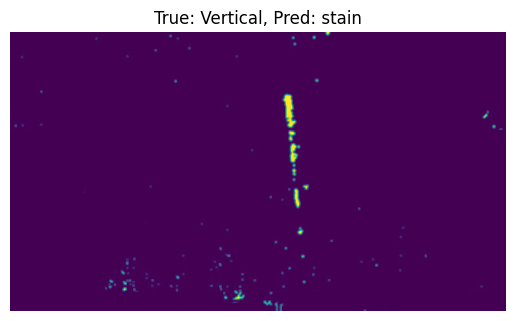


Image Index: 3
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


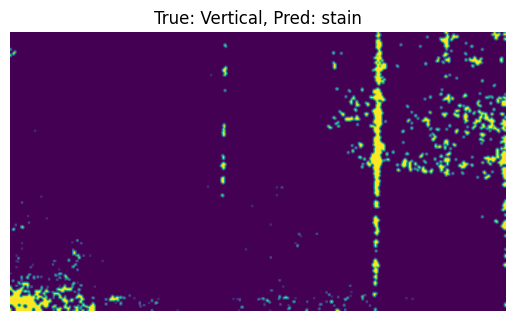


Image Index: 4
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


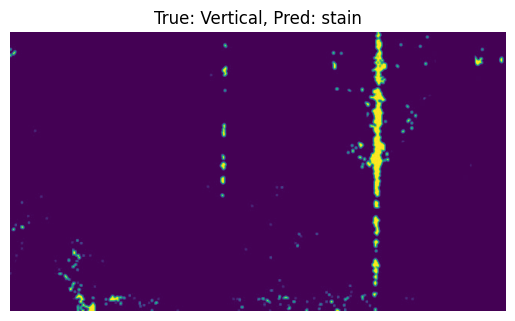


Image Index: 5
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


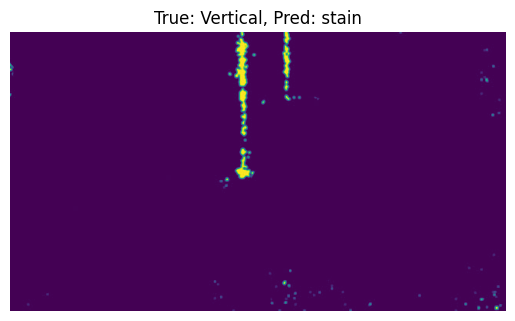


Image Index: 6
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


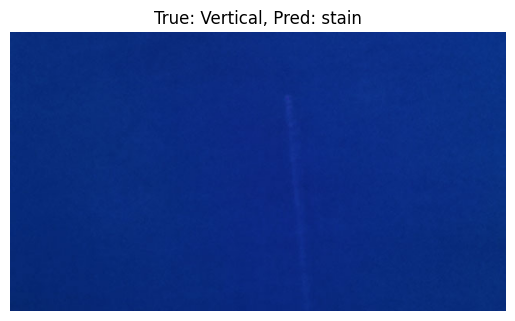


Image Index: 7
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


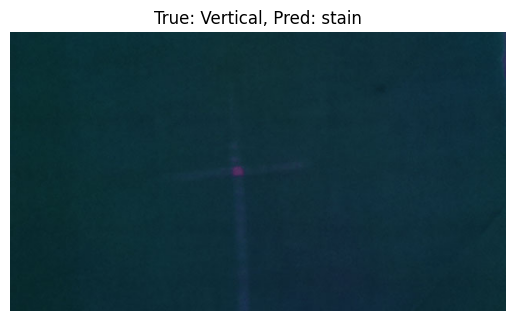


Image Index: 8
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


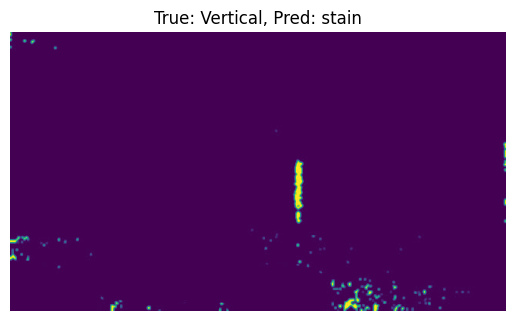


Image Index: 9
True Label: Vertical
Predicted Label: stain
Class Probabilities: [0.09635504 0.18647753 0.09467053 0.18882716 0.21677051 0.21689928]


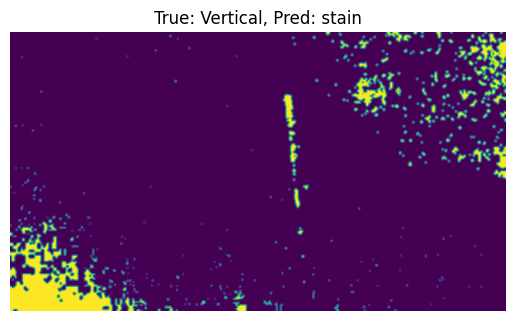

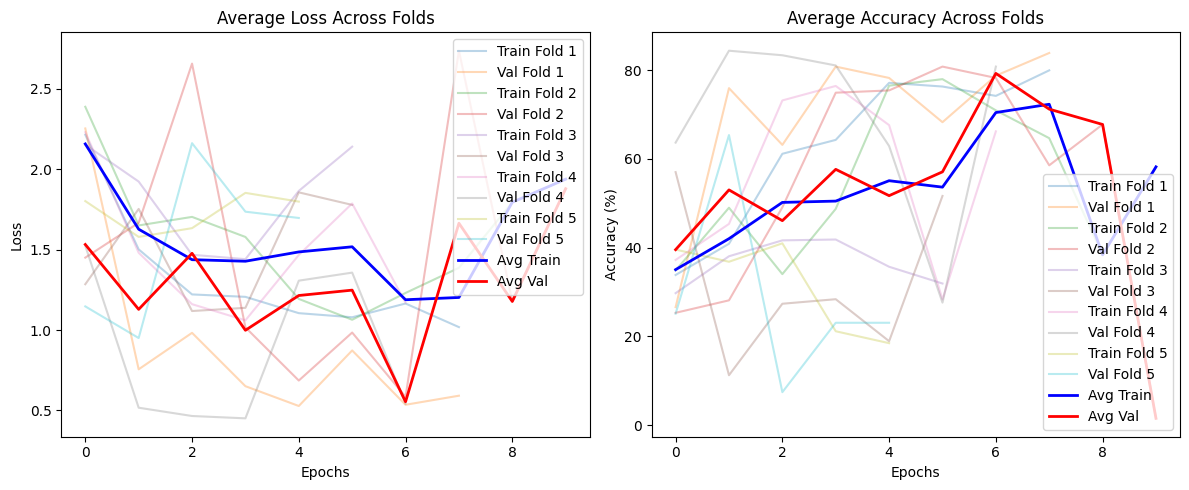


Average Training Loss: 1.5907
Average Validation Loss: 1.2578
Average Training Accuracy: 48.61%
Average Validation Accuracy: 50.77%


In [6]:
from sklearn.model_selection import StratifiedKFold  # Changed to StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get all labels for stratified splitting
all_labels = [dataset[i][1] for i in range(len(dataset))]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(np.zeros(len(dataset)), all_labels)):  # Stratified split
    print(f"Fold {fold + 1}")
    
    # Split dataset into training and validation sets
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Calculate class weights
    train_labels = [all_labels[i] for i in train_idx]
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(all_labels),
                                       y=train_labels)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

    # Load pre-trained VGG-19 model
    model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)
    # Modify the classifier's last layer
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(dataset.classes))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    
    # Loss function with class weights
    criterion = nn.CrossEntropyLoss(weight=class_weights)  # Added class weights
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
    
    # Early stopping
    best_val_loss = float('inf')
    patience = 3
    trigger_times = 0
    
    # Training loop
    num_epochs = 20
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        true_labels, predicted_labels, predictions = [], [], []
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
                
                true_labels.extend(labels.cpu().numpy())
                predicted_labels.extend(predicted.cpu().numpy())
                predictions.extend(torch.softmax(outputs, dim=1).cpu().numpy())
        
        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%')
        
        # Learning rate scheduler
        scheduler.step(val_loss)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping!")
                break
    
    # Store fold results
    fold_results.append({
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accs': train_accs,
        'val_accs': val_accs,
        'true_labels': true_labels,
        'predicted_labels': predicted_labels,
        'predictions': predictions
    })
    
     # After training loop, plot graphs
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Loss Curves - Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title(f'Accuracy Curves - Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.show()

    # Classification Report
    print(f"Classification Report - Fold {fold + 1}")
    print(classification_report(true_labels, predicted_labels, target_names=dataset.classes))

    # ROC/AUC Curve for Multiclass Classification
    true_labels_bin = label_binarize(true_labels, classes=np.arange(len(dataset.classes)))

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(dataset.classes)):
        fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], np.array(predictions)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed
    for i, color in zip(range(len(dataset.classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {dataset.classes[i]}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multiclass Classification - Fold {fold + 1}')
    plt.legend(loc="lower right")
    plt.show()

    # Misclassified Images
    misclassified_idx = [i for i, (p, t) in enumerate(zip(predicted_labels, true_labels)) if p != t]
    for idx in misclassified_idx[:10]:  # Limit to first 10 for visualization
        true_label = dataset.classes[true_labels[idx]]
        predicted_label = dataset.classes[predicted_labels[idx]]
        probabilities = predictions[idx]

        print(f"\nImage Index: {idx}")
        print(f"True Label: {true_label}")
        print(f"Predicted Label: {predicted_label}")
        print(f"Class Probabilities: {probabilities}")

        # Visualize the misclassified image
        img = Image.open(dataset.images[idx][0])
        plt.imshow(img)
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.xlabel(f"Probs: {probabilities}")
        plt.axis('off')
        plt.show()

# After all folds
plt.figure(figsize=(12, 5))

# Average loss plot
all_train_loss = [np.array(f['train_losses']) for f in fold_results]
all_val_loss = [np.array(f['val_losses']) for f in fold_results]
max_epochs = max(len(l) for l in all_train_loss)

# Pad shorter sequences with NaNs
padded_train = [np.pad(l, (0, max_epochs-len(l)), 
                      mode='constant', 
                      constant_values=np.nan) for l in all_train_loss]
padded_val = [np.pad(l, (0, max_epochs-len(l)), 
                    mode='constant', 
                    constant_values=np.nan) for l in all_val_loss]

plt.subplot(1, 2, 1)
for i, (train, val) in enumerate(zip(padded_train, padded_val)):
    plt.plot(train, alpha=0.3, label=f'Train Fold {i+1}')
    plt.plot(val, alpha=0.3, label=f'Val Fold {i+1}')
plt.plot(np.nanmean(padded_train, axis=0), 'b-', linewidth=2, label='Avg Train')
plt.plot(np.nanmean(padded_val, axis=0), 'r-', linewidth=2, label='Avg Val')
plt.title('Average Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Average accuracy plot
all_train_acc = [np.array(f['train_accs']) for f in fold_results]
all_val_acc = [np.array(f['val_accs']) for f in fold_results]

padded_train_acc = [np.pad(l, (0, max_epochs-len(l)), 
                         mode='constant', 
                         constant_values=np.nan) for l in all_train_acc]
padded_val_acc = [np.pad(l, (0, max_epochs-len(l)), 
                mode='constant', 
                constant_values=np.nan) for l in all_val_acc]

plt.subplot(1, 2, 2)
for i, (train, val) in enumerate(zip(padded_train_acc, padded_val_acc)):
    plt.plot(train, alpha=0.3, label=f'Train Fold {i+1}')
    plt.plot(val, alpha=0.3, label=f'Val Fold {i+1}')
plt.plot(np.nanmean(padded_train_acc, axis=0), 'b-', linewidth=2, label='Avg Train')
plt.plot(np.nanmean(padded_val_acc, axis=0), 'r-', linewidth=2, label='Avg Val')
plt.title('Average Accuracy Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Print average results across all folds
avg_train_loss = np.mean([np.mean(fold['train_losses']) for fold in fold_results])
avg_val_loss = np.mean([np.mean(fold['val_losses']) for fold in fold_results])
avg_train_acc = np.mean([np.mean(fold['train_accs']) for fold in fold_results])
avg_val_acc = np.mean([np.mean(fold['val_accs']) for fold in fold_results])

print(f"\nAverage Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")
print(f"Average Training Accuracy: {avg_train_acc:.2f}%")
print(f"Average Validation Accuracy: {avg_val_acc:.2f}%")